In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from matplotlib import pyplot
import pickle

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sethukrish6420/sethuraman/main/train.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**Understand the data**


In [ ]:
df.shapeFinal_project

(45211, 11)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

In [ ]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

Clean the data

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['job'] = df['job'].map(lambda x: 'blue-collar' if x == 'unknown' else x)

In [ ]:
df['job'].value_counts()

blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [ ]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
df['education_qual'] = df['education_qual'].map(lambda x: 'secondary' if x == 'unknown' else x)

In [ ]:
df['education_qual'].value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education_qual, dtype: int64

In [ ]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
del df['call_type']

In [ ]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
del df['prev_outcome']

In [ ]:
df.shape

(45211, 9)

In [ ]:
df.head(3)

,age,job,marital,education_qual,day,mon,dur,num_calls,y
0,58,management,married,tertiary,5,may,261,1,no
1,44,technician,single,secondary,5,may,151,1,no
2,33,entrepreneur,married,secondary,5,may,76,1,no


In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


Checking Outliers

In [ ]:
# In age column

iqr = 48-33
iqr

15

In [ ]:
lower_fence = 33 - 1.5*iqr
lower_fence

10.5

In [ ]:
upper_fence = 48 + 1.5*iqr
upper_fence

70.5

In [ ]:
df = df[ df['age'] < upper_fence]
df = df[df['age'] > lower_fence]

In [ ]:
df['age'].describe()

count    44724.000000
mean        40.545524
std          9.978232
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

In [ ]:
# In day column
iqr = 21- 8
iqr

13

In [ ]:
df = df[df['day'] > (8 - (1.5*iqr))]
df = df[df['day'] < (21 + (1.5*iqr))]


In [ ]:
df['day'].describe()

count    44724.000000
mean        15.812718
std          8.324820
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

In [ ]:
# In dur column
iqr = 319 - 103
iqr

216

In [ ]:
df = df[df['dur'] > (103 - (1.5*iqr))]
df = df[df['dur'] < (319 + (1.5*iqr))]
df['dur'].describe()

count    41531.000000
mean       202.784763
std        140.528686
min          0.000000
25%         98.000000
50%        167.000000
75%        276.000000
max        642.000000
Name: dur, dtype: float64

In [ ]:
# In num_calls column
iqr = 3 - 1
iqr

2

In [ ]:
df = df[df['num_calls'] > (1 - (1.5*iqr))]
df = df[df['num_calls'] < (3 + (1.5*iqr))]
df['num_calls'].describe()

count    35823.000000
mean         1.868855
std          0.966352
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: num_calls, dtype: float64

In [ ]:
df.drop_duplicates()

,age,job,marital,education_qual,day,mon,dur,num_calls,y
0,58,management,married,tertiary,5,may,261,1,no
1,44,technician,single,secondary,5,may,151,1,no
2,33,entrepreneur,married,secondary,5,may,76,1,no
3,47,blue-collar,married,secondary,5,may,92,1,no
4,33,blue-collar,single,secondary,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...
45202,34,admin.,single,secondary,17,nov,224,1,yes
45203,23,student,single,tertiary,17,nov,266,1,yes
45205,25,technician,single,secondary,17,nov,386,2,yes
45209,57,blue-collar,married,secondary,17,nov,508,4,no


In [ ]:
df.shape

(35823, 9)

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
day                int64
mon               object
dur                int64
num_calls          int64
y                 object
dtype: object

**visualization**

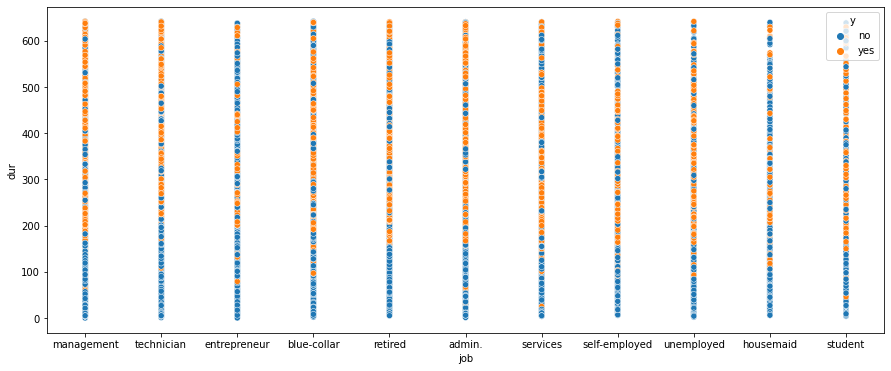

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data=df,x='job',y='dur',hue='y')

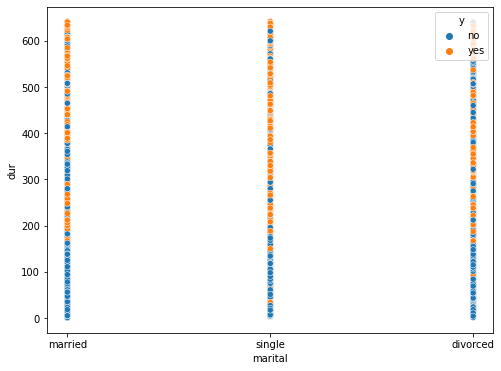

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='marital',y='dur',hue='y')

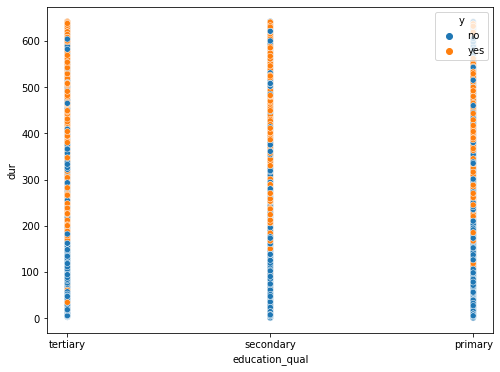

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='education_qual',y='dur',hue='y')

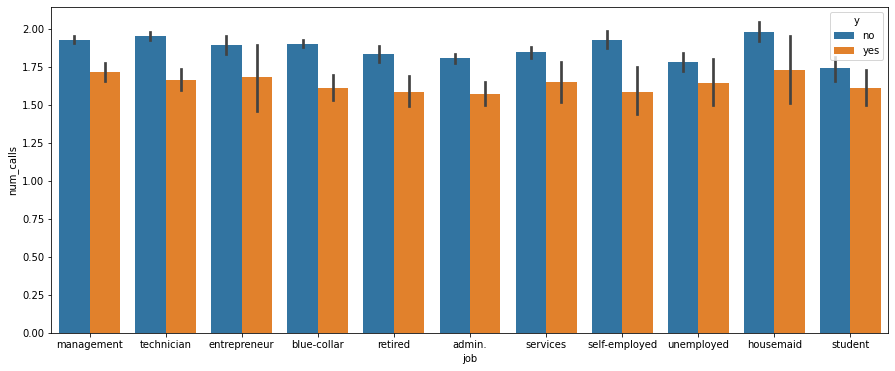

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(data=df,x='job',y='num_calls',hue='y')

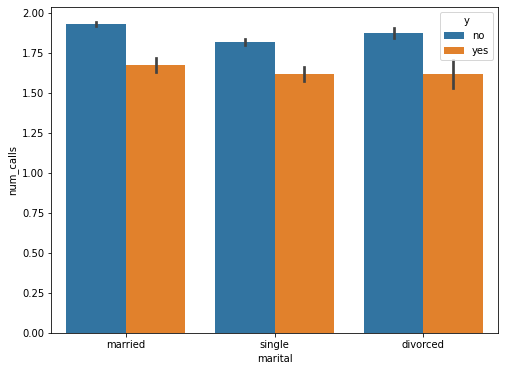

In [ ]:
plt.figure(figsize = (8,6))
sns.barplot(data=df,x='marital',y='num_calls',hue='y')

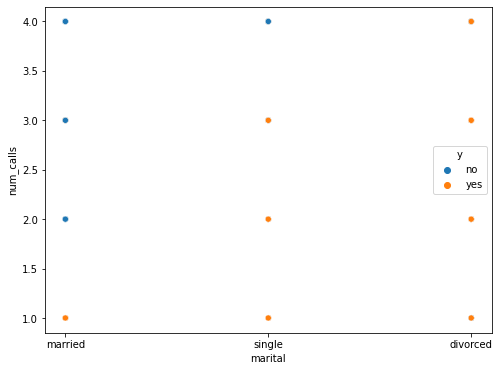

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='marital',y='num_calls',hue='y')

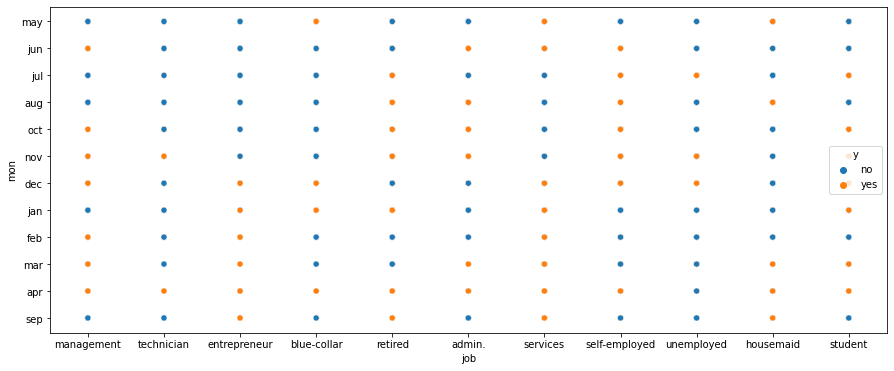

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data=df,x='job',y='mon',hue='y')

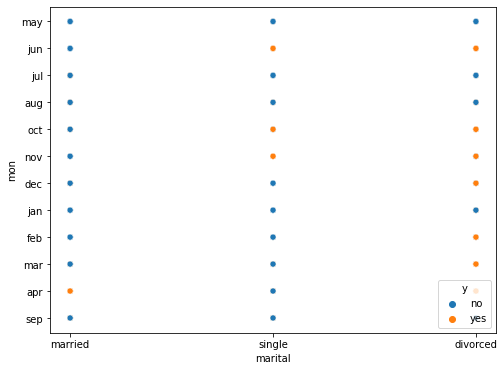

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='marital',y='mon',hue='y')

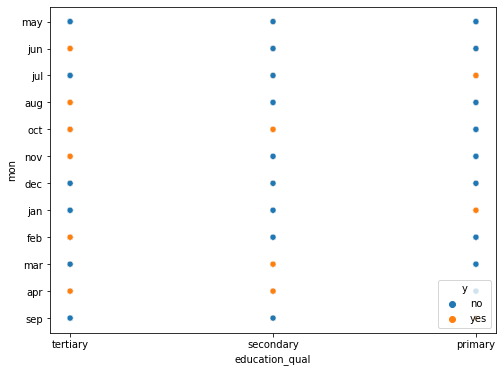

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='education_qual',y='mon',hue='y')

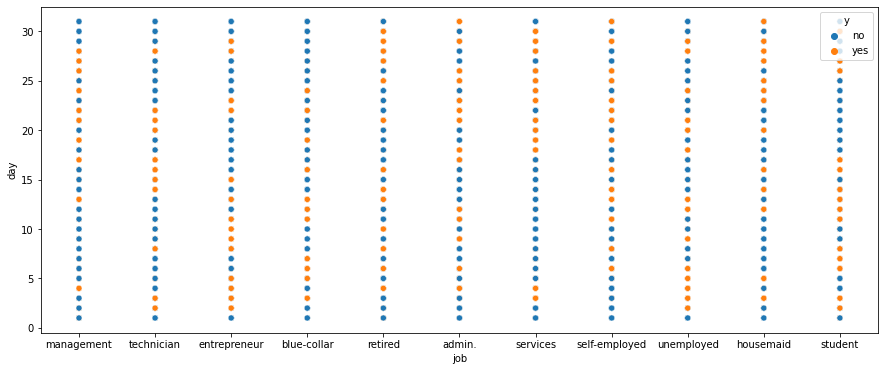

In [ ]:
plt.figure(figsize = (15,6))
sns.scatterplot(data=df,x='job',y='day',hue='y')

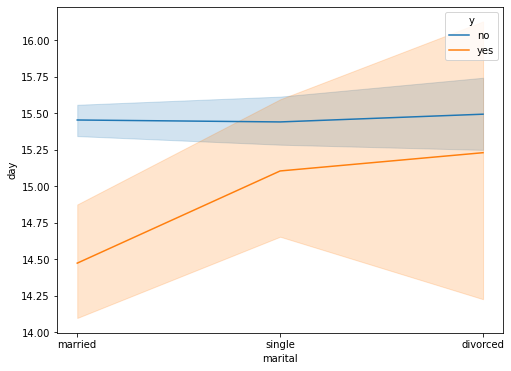

In [ ]:
plt.figure(figsize = (8,6))
sns.lineplot(data=df,x='marital',y='day',hue='y')

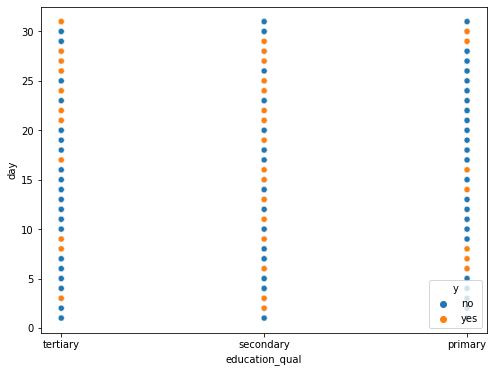

In [ ]:
plt.figure(figsize = (8,6))
sns.scatterplot(data=df,x='education_qual',y='day',hue='y')

Encode the data

In [ ]:
df1 = df

In [ ]:
df1 = pd.get_dummies(df1,columns = ['job'])
df1 = pd.get_dummies(df1,columns = ['marital'])
df1["education_qual"] = df1["education_qual"].map({"primary" : 0, "secondary" : 1,"tertiary" : 2})
df1 = pd.get_dummies(df1,columns = ['mon'])
df1["y"] = df1["y"].map({"yes" : 1, "no" : 0}) 

In [ ]:
pd.set_option('display.max_columns',None)
df1.head(2)


,age,education_qual,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,mon_apr,mon_aug,mon_dec,mon_feb,mon_jan,mon_jul,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep
0,58,2,5,261,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,44,1,5,151,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df1['y'].value_counts()

0    32568
1     3255
Name: y, dtype: int64

In [ ]:
# In this data 0 is morethan 75% so it is imbalanced data so convert into balanced data

In [ ]:
df1.columns

Index(['age', 'education_qual', 'day', 'dur', 'num_calls', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'mon_apr', 'mon_aug', 'mon_dec',
       'mon_feb', 'mon_jan', 'mon_jul', 'mon_jun', 'mon_mar', 'mon_may',
       'mon_nov', 'mon_oct', 'mon_sep'],
      dtype='object')

In [ ]:
x = df1[['age','education_qual','day','dur','num_calls','job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management',
            'job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','marital_divorced','marital_married',
             'marital_single','mon_apr','mon_aug','mon_dec','mon_feb','mon_jan','mon_jul','mon_jun','mon_mar','mon_may','mon_nov','mon_oct','mon_sep']].values

y = df1['y'].values

In [ ]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_smt, y_smt = smt.fit_resample(x, y)

In [ ]:
from collections import Counter

In [ ]:
print(Counter(y))
print(Counter(y_smt))

Counter({0: 32568, 1: 3255})
Counter({1: 30508, 0: 19648})


In [ ]:
# so the data is balanced

In [ ]:
# split the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smt,y_smt,test_size=0.25)

In [ ]:
# Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
# modeling the data
# In this data is classification data so to do all the classification ml models

In [ ]:
# logistic regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
log.predict_proba(x_test)


array([[9.54196746e-01, 4.58032536e-02],
       [1.02810421e-04, 9.99897190e-01],
       [9.10388547e-01, 8.96114530e-02],
       ...,
       [9.64199513e-01, 3.58004875e-02],
       [4.99736410e-03, 9.95002636e-01],
       [3.55346455e-06, 9.99996447e-01]])

In [ ]:
# score the data
score = log.score(x_test,y_test)
score

0.9462477071536806

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
accuracy_score(y_test,y_pred)

0.9462477071536806

In [ ]:
f1_score(y_test,y_pred)

0.9550846328135413

In [ ]:
roc_auc_score(y_test,log.predict_proba(x_test)[:,1])

0.9892415995870161

In [ ]:
# knn model 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print('K_value : ',i, 'cv_score: ',np.mean(cross_val_score(knn,x_train,y_train,cv=10,scoring='roc_auc')))


K_value :  1 cv_score:  0.9423321796399365
K_value :  2 cv_score:  0.9673427044124748
K_value :  3 cv_score:  0.9752495844446983
K_value :  4 cv_score:  0.9783802146052036
K_value :  5 cv_score:  0.9801534316783265
K_value :  6 cv_score:  0.981340170309149
K_value :  7 cv_score:  0.9822856716854014
K_value :  8 cv_score:  0.983150963624456
K_value :  9 cv_score:  0.9837240439261038
K_value :  10 cv_score:  0.9840687471245392
K_value :  20 cv_score:  0.9846178299659613
K_value :  50 cv_score:  0.9828452161045153


In [ ]:
# so in this data k= 20 is a best value

In [ ]:
knn = KNeighborsClassifier(20)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9409043783395805

In [ ]:
# evaluation 


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,knn.predict_proba(x_test)[:,1])

0.9849830644181347

In [ ]:
# Desicion tree classification 

In [ ]:
# Find the best depth value
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10]:
  dt = DecisionTreeClassifier(max_depth = i)
  dt.fit(x_train,y_train)
  print('depth_value = ', i , 'cv_score = ',np.mean(cross_val_score(dt,x_train,y_train,cv=10)))

depth_value =  1 cv_score =  0.7681099679819224
depth_value =  2 cv_score =  0.8107236529359705
depth_value =  3 cv_score =  0.8374139525652982
depth_value =  4 cv_score =  0.853497096095649
depth_value =  5 cv_score =  0.8704840848909476
depth_value =  6 cv_score =  0.8952335385933674
depth_value =  7 cv_score =  0.910705248654982
depth_value =  8 cv_score =  0.9231995432571989
depth_value =  9 cv_score =  0.9318657686169127
depth_value =  10 cv_score =  0.9385118414302982


In [ ]:
# best depth = 10

In [ ]:
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.9397081106946328

In [ ]:
#evaluation
from sklearn.metrics import roc_auc_score
dt = DecisionTreeClassifier(max_depth = 10)
dt.fit(x_train,y_train)
roc_auc_score(y_test,dt.predict_proba(x_test)[:,1])

0.9726301595630753

In [ ]:
# Feature importance

dt = DecisionTreeClassifier(max_depth = 10)
# Fit dt to the training set
dt.fit(x_train, y_train)
importance = dt.feature_importances_
feature_names = np.array(['age','education_qual','day','dur','num_calls','job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management',
            'job_retired','job_self-employed','job_services','job_student','job_technician','job_unemployed','marital_divorced','marital_married',
             'marital_single','mon_apr','mon_aug','mon_dec','mon_feb','mon_jan','mon_jul','mon_jun','mon_mar','mon_may','mon_nov','mon_oct','mon_sep'])
for feature_name, importance in zip(feature_names, importance):
    print(f"{feature_name}: {importance:.4f}")



age: 0.0374
education_qual: 0.0013
day: 0.0649
dur: 0.4132
num_calls: 0.0199
job_admin.: 0.0012
job_blue-collar: 0.0050
job_entrepreneur: 0.0006
job_housemaid: 0.0003
job_management: 0.0017
job_retired: 0.0002
job_self-employed: 0.0000
job_services: 0.0003
job_student: 0.0015
job_technician: 0.0027
job_unemployed: 0.0002
marital_divorced: 0.0173
marital_married: 0.0195
marital_single: 0.0214
mon_apr: 0.0213
mon_aug: 0.0393
mon_dec: 0.0000
mon_feb: 0.0195
mon_jan: 0.0203
mon_jul: 0.0570
mon_jun: 0.0440
mon_mar: 0.0009
mon_may: 0.1376
mon_nov: 0.0497
mon_oct: 0.0010
mon_sep: 0.0007


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


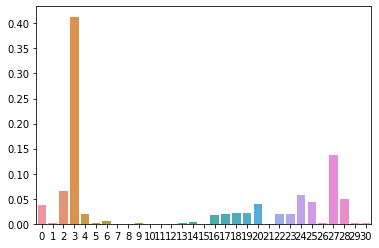

In [ ]:
importance = dt.feature_importances_
sns.barplot([x for x in range(len(importance))],importance)

So in this data the feature importants are, 


1. duration
2. month of may
3. month of july 
4. month of november



In [ ]:
# voting Classifier
from sklearn.ensemble import VotingClassifier
model_1 = LogisticRegression()
model_2 = DecisionTreeClassifier(max_depth = 10)
model_3 = KNeighborsClassifier(20)
vc = VotingClassifier(estimators = [('lr',model_1),('dt',model_2),('knn',model_3)],voting='soft')
vc.fit(x_train,y_train)
y_pred = vc.predict(x_test)
y_pred


array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
vc.score(x_test,y_test)

0.9559773506659224

In [ ]:
# Evaluation
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,vc.predict_proba(x_test)[:,1])

0.9918657412839794

In [ ]:
# Random Foresting
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth = 10,max_features=  'sqrt')
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)


0.942260148337188

In [ ]:
# Evaluation
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,rfc.predict_proba(x_test)[:,1])

0.9872030588117328

In [ ]:
# XGboost

import xgboost as xgb
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12]:
  xb = xgb.XGBClassifier(learning_rate = lr,n_estimators=100,verbosity = 0)
  xb.fit(x_train,y_train)
  print('lr value = ',lr,'cv_score = ', np.mean(cross_val_score(xb,x_train,y_train,cv=10)))

lr value =  0.01 cv_score =  0.8571120318905763
lr value =  0.02 cv_score =  0.8832971679317136
lr value =  0.03 cv_score =  0.9049631271219873
lr value =  0.04 cv_score =  0.9205412342826802
lr value =  0.05 cv_score =  0.9292606369888448
lr value =  0.06 cv_score =  0.9356407735961045
lr value =  0.07 cv_score =  0.9409840508953288
lr value =  0.08 cv_score =  0.9445728644849819
lr value =  0.09 cv_score =  0.9471781303992781
lr value =  0.1 cv_score =  0.9488795439809309
lr value =  0.11 cv_score =  0.9507669369212352
lr value =  0.12 cv_score =  0.9527873297692355


In [ ]:
xb = xgb.XGBClassifier(learning_rate = 0.12,n_estimators=100,verbosity = 0)
xb.fit(x_train,y_train)
xb.score(x_test,y_test)

0.9535848153760268

In [ ]:
# Evaluation
from sklearn.metrics import roc_auc_score
xb = xgb.XGBClassifier(learning_rate = 0.12,n_estimators=100,verbosity = 0)
xb.fit(x_train,y_train)
roc_auc_score(y_test,xb.predict_proba(x_test)[:,1])

0.9900563149631376

In [ ]:
with open('scale.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(xb, f)

In [ ]:
age = 45
job = 'management'
marital = 'single'
month = 'may'




In [ ]:

with open('scale.pkl', 'rb') as f:
    scaler = pickle.load(f)



In [ ]:
with open('model.pkl', 'rb') as f:
    xb = pickle.load(f)

In [106]:
scaler.transform()

TypeError: ignored

In [ ]:
prediction = xb.predict()
prediction